# Analysis on Whether Renovations are Causing Bedrooms to Decrease

Hypothesis: The assumption I have is that renovations could lead to a decrease in the number of bedrooms, possibly due to homeowners combining smaller rooms to create larger spaces or repurposing bedrooms for other uses.

Data Requirements: For this analysis, I'll need:

- Data on the number of bedrooms before and after renovations, we have data on bedrooms starting from 2008.

- Renovation dates or periods to compare changes over time.
Any additional information on the type of renovation could be very useful.

To start i want to check the data for 2014, and 2021, 2022, 2023 and possibly 2024 to see what the data error I was getting in my notebook (Variables_in_Property_Assesment-Yearly_Analysis.ipynb) when analzing the bedroom data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


While pulling the data I thought I should also pull columns relating to the renovations.

Relevant Columns for Analysis:

**YR_REMODEL**: Year the property was last remodeled. This column is critical for identifying properties that have undergone renovations.

**RES_UNITS**: Number of residential units in a condominium building, which might also be useful if renovations affected the division of units.

// For later

**Location**: Might help with creating a heatmap/location hot spots of where renovations are affecting bedrooms - further analysis on this where we map areas to neighbhood demographics may correlate with areas that are being gentrified.

In [2]:
pa_2008 = pd.read_csv('../data/property_assessment_2008.csv')[['PID','LU', 'FY2008_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES']] 
# R_BDRMS = bedrooms, S_UNIT_RES' = residential units

pa_2009 = pd.read_csv('../data/property_assessment_2009.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES']] 
# AV_TOTAL is now the total value of property

pa_2010 = pd.read_csv('../data/property_assessment_2010.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES']] 
pa_2011 = pd.read_csv('../data/property_assessment_2011.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES']] 
pa_2012 = pd.read_csv('../data/property_assessment_2012.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES']] 
pa_2013 = pd.read_csv('../data/property_assessment_2013.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES']] 

pa_2014 = pd.read_csv('../data/property-assessment-fy2014.csv')[['Parcel_ID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES']] 


pa_2015 = pd.read_csv('../data/property_assessment_2015.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES']] 
pa_2016 = pd.read_csv('../data/property_assessment_2016.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES']] 
pa_2017 = pd.read_csv('../data/property_assessment_2017.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES']] 
pa_2018 = pd.read_csv('../data/property_assessment_2018.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES']] 
pa_2019 = pd.read_csv('../data/property_assessment_2019.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES']] 
pa_2020 = pd.read_csv('../data/property_assessment_2020.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES']] 

pa_2021 = pd.read_csv('../data/property_assessment_2021.csv')[['PID','LU', 'TOTAL_VALUE', 'GROSS_AREA', 'LIVING_AREA', 'BED_RMS', 'YR_REMODEL', 'RES_UNITS']] 
# AV_Total is now TOTAL_VALUE, R_BDRMS is now BED_RMS

pa_2022 = pd.read_csv('../data/property_assessment_2022.csv')[['PID','LU', 'TOTAL_VALUE', 'GROSS_AREA', 'LIVING_AREA', 'BED_RMS', 'YR_REMODEL', 'RES_UNITS']]
pa_2023 = pd.read_csv('../data/property_assessment_2023.csv')[['PID','LU', 'TOTAL_VALUE', 'GROSS_AREA', 'LIVING_AREA', 'BED_RMS', 'YR_REMODEL', 'RES_UNITS']]
pa_2024 = pd.read_csv('../data/property_assessment_2024.csv')[['PID','LU', 'TOTAL_VALUE', 'GROSS_AREA', 'LIVING_AREA', 'BED_RMS', 'YR_REMODEL', 'RES_UNITS']]

/var/folders/d0/35z98j6s1_s8v_lhkt9b2wcw0000gn/T/ipykernel_28411/2948151279.py:1: DtypeWarning: Columns (7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2008 = pd.read_csv('../data/property_assessment_2008.csv')[['PID','LU', 'FY2008_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES']]
/var/folders/d0/35z98j6s1_s8v_lhkt9b2wcw0000gn/T/ipykernel_28411/2948151279.py:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2009 = pd.read_csv('../data/property_assessment_2009.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES']]
/var/folders/d0/35z98j6s1_s8v_lhkt9b2wcw0000gn/T/ipykernel_28411/2948151279.py:7: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2010 = pd.read_csv('../data/property_assessment_2010.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_

In [3]:
print(pa_2017.head(10))

           PID  LU  AV_TOTAL  GROSS_AREA  LIVING_AREA  R_BDRMS  YR_REMOD  \
0  0100001000_  R3    419900      3353.0       2202.0      6.0       NaN   
1  0100002000_  R3    462500      3299.0       2307.0      3.0    2000.0   
2  0100003000_  R3    421000      3392.0       2268.0      5.0    1985.0   
3  0100004000_  R3    402200      3108.0       2028.0      5.0    1991.0   
4  0100005000_  R2    421200      3700.0       2546.0      6.0    1978.0   
5  0100006000_  R3    493900      6278.0       4362.0      9.0       0.0   
6  0100007000_  R3    531600      6432.0       4296.0      8.0    2009.0   
7  0100008000_  R3    546000      6048.0       4080.0     11.0       0.0   
8  0100009000_  R3    418600      4357.0       2937.0      5.0    1998.0   
9  0401750010_  CD    331300       529.0        529.0      NaN    1984.0   

   S_UNIT_RES  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  
6         NaN  
7         NaN  
8         NaN  
9  

To start lets filter the data based on land usage codes and check the bedroom plot again to see if we get similar results.

### Land Usage Code Key

| Code | Type |
|------|-----------|
| A    | Residental (7 or more Units) |
| AH   | Agricultural/Horticultural |
| C    | Commercial |
| CC   | Commercial Condominium |
| CD   | Residental Condominium Unit | 
| CL   | Commercial Land | 
| CM   | Condomonium Building (excluding units) |
| CP   | Condomonium Parking | 
| E    | Tax Exempt |
| EA   | Tax Exempt (121A) |
| I    | Industrial |
| R1   | Residental One-Family Home |
| R2   | Residental Two-Family Home |
| R3   | Residental Three-Family Home |
| R4   | Residental Four-Family Home |
| RC   | Mixed Use (Residental and Commercial) |

In [4]:
# Store the DataFrames in a dictionary for easier access
pa_data = {
    2008: pa_2008,
    2009: pa_2009,
    2010: pa_2010,
    2011: pa_2011,
    2012: pa_2012,
    2013: pa_2013,
    2014: pa_2014,
    2015: pa_2015,
    2016: pa_2016,
    2017: pa_2017,
    2018: pa_2018,
    2019: pa_2019,
    2020: pa_2020,
    2021: pa_2021,
    2022: pa_2022,
    2023: pa_2023,
    2024: pa_2024,
}

LU_filtered_pa_data = {}

residential_codes = ['R1', 'R2', 'R3', 'RC', 'R4', 'A', 'CD']

# Loop through each year's DataFrame and filter it
for year, df in pa_data.items():
    LU_filtered_pa_data[year] = df[df['LU'].isin(residential_codes)]

Lets check for null values.

In [5]:
for year, dataset in LU_filtered_pa_data.items():
    
    print("")
    print("Dataset:"+str(year))
    print("")
    null_counts = dataset.isnull().sum()
    print("Number of null values in each column:\n", null_counts)


Dataset:2008

Number of null values in each column:
 PID                  0
LU                   0
FY2008_TOTAL         0
GROSS_AREA         148
LIVING_AREA        148
R_BDRMS          60004
YR_REMOD          8722
S_UNIT_RES      122877
dtype: int64

Dataset:2009

Number of null values in each column:
 PID                 0
LU                  0
AV_TOTAL            0
GROSS_AREA        150
LIVING_AREA       150
R_BDRMS         62256
YR_REMOD        10181
S_UNIT_RES     123688
dtype: int64

Dataset:2010

Number of null values in each column:
 PID                 0
LU                  0
AV_TOTAL            0
GROSS_AREA        143
LIVING_AREA       143
R_BDRMS         63868
YR_REMOD        10859
S_UNIT_RES     125120
dtype: int64

Dataset:2011

Number of null values in each column:
 PID                 0
LU                  0
AV_TOTAL            0
GROSS_AREA        139
LIVING_AREA       139
R_BDRMS         64834
YR_REMOD        11449
S_UNIT_RES     127170
dtype: int64

Dataset:2012

Numbe

Given the substantial number of null values in several columns across the datasets, particularly in columns like R_BDRMS, YR_REMOD, and S_UNIT_RES, dropping all rows with nulls might lead to significant data loss, which could affect the analysis.

## Bedroom Analysis - pt.2

However for starters i want to see how the average bedrooms have changed over the years so for this case lets drop the rows without bedrooms as they wont contribute anyway.

In [6]:

average_bedrooms_per_year = {}
filtered_bedroom_dfs = {}
years_where_bedrooms_name_changed = [2021, 2022, 2023, 2024]

for year, df in pa_data.items():
    if year in years_where_bedrooms_name_changed:

        # Drop rows where 'R_BDRMS' is NaN
        df_filtered = df.dropna(subset=['BED_RMS'])
        filtered_bedroom_dfs[year] = df_filtered
        # Calculate the mean of 'R_BDRMS'
        average_bedrooms = df_filtered['BED_RMS'].mean()
        # Store the average in the dictionary
        average_bedrooms_per_year[year] = average_bedrooms
    else:
        # Drop rows where 'R_BDRMS' is NaN
        df_filtered = df.dropna(subset=['R_BDRMS'])
        filtered_bedroom_dfs[year] = df_filtered
        # Calculate the mean of 'R_BDRMS'
        average_bedrooms = df_filtered['R_BDRMS'].mean()
        # Store the average in the dictionary
        average_bedrooms_per_year[year] = average_bedrooms

# Print the results
for year, avg in average_bedrooms_per_year.items():
    print(f"Year {year}: Average Bedrooms = {avg:.2f}")

Year 2008: Average Bedrooms = 4.60
Year 2009: Average Bedrooms = 4.60
Year 2010: Average Bedrooms = 4.61
Year 2011: Average Bedrooms = 4.60
Year 2012: Average Bedrooms = 4.60
Year 2013: Average Bedrooms = 4.61
Year 2014: Average Bedrooms = 1.77
Year 2015: Average Bedrooms = 4.63
Year 2016: Average Bedrooms = 4.64
Year 2017: Average Bedrooms = 4.65
Year 2018: Average Bedrooms = 4.66
Year 2019: Average Bedrooms = 4.68
Year 2020: Average Bedrooms = 4.67
Year 2021: Average Bedrooms = 3.25
Year 2022: Average Bedrooms = 2.34
Year 2023: Average Bedrooms = 3.16
Year 2024: Average Bedrooms = 3.15


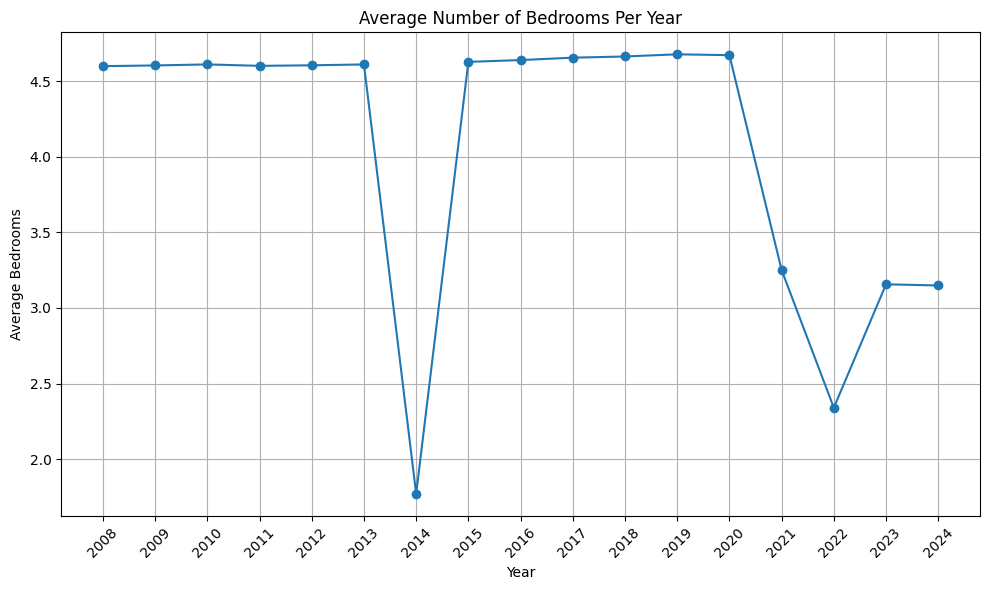

In [7]:
years = list(average_bedrooms_per_year.keys())
average_bedrooms = list(average_bedrooms_per_year.values())

plt.figure(figsize=(10, 6))
plt.plot(years, average_bedrooms, marker='o')
plt.title('Average Number of Bedrooms Per Year')
plt.xlabel('Year')
plt.ylabel('Average Bedrooms')
plt.grid(True)
plt.xticks(years, rotation=45)  # Rotate years for better readability
plt.tight_layout()
plt.show()

Took a look at the 2014 and 2022 data and saw that instead of rows being filled with null values they have been filled with zeroes, so lets modify that to drop rows with zero.

In [8]:
data_2014 = pa_data[2014]
data_2022 = pa_data[2022]

# Drop rows where 'R_BDRMS' is NaN
data_2014_filtered = data_2014.dropna(subset=['R_BDRMS'])
data_2022_filtered = data_2022.dropna(subset=['BED_RMS'])

# Drop rows where 'R_BDRMS' is 0
data_2014_filtered_no_zeroes = data_2014_filtered[data_2014_filtered['R_BDRMS'] != 0]
data_2022_filtered_no_zeroes = data_2022_filtered[data_2022_filtered['BED_RMS'] != 0]

# Calculate the mean of 'R_BDRMS'
average_bedrooms = data_2014_filtered_no_zeroes['R_BDRMS'].mean()
average_bedrooms2 = data_2022_filtered_no_zeroes['BED_RMS'].mean()

# Store the average in the dictionary
average_bedrooms_per_year[2014] = average_bedrooms
average_bedrooms_per_year[2022] = average_bedrooms2

# Store DF in dictionary
filtered_bedroom_dfs[2014] = data_2014_filtered_no_zeroes
filtered_bedroom_dfs[2022] = data_2022_filtered_no_zeroes

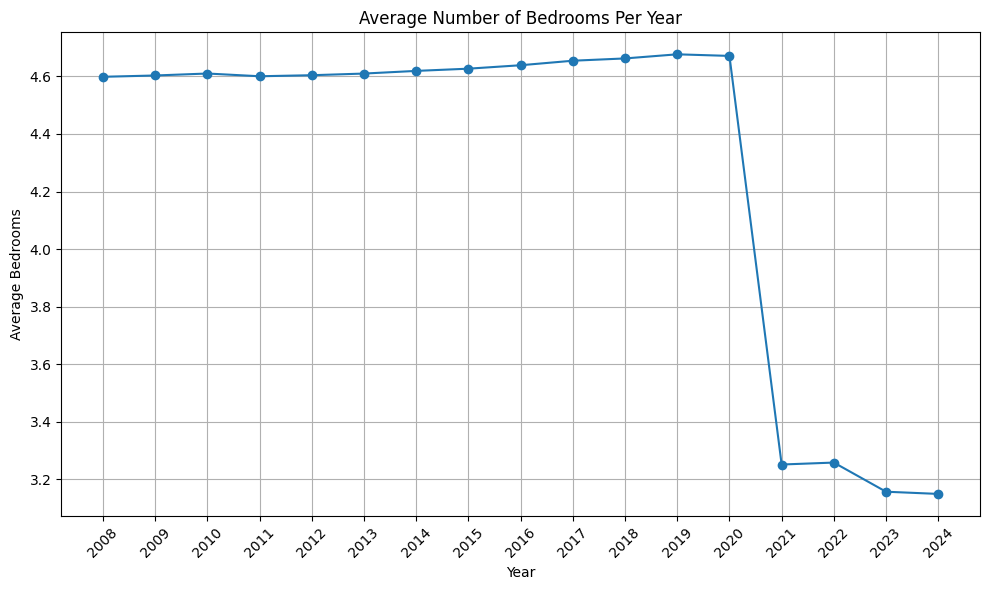

In [9]:
years = list(average_bedrooms_per_year.keys())
average_bedrooms = list(average_bedrooms_per_year.values())

plt.figure(figsize=(10, 6))
plt.plot(years, average_bedrooms, marker='o')
plt.title('Average Number of Bedrooms Per Year')
plt.xlabel('Year')
plt.ylabel('Average Bedrooms')
plt.grid(True)
plt.xticks(years, rotation=45)  # Rotate years for better readability
plt.tight_layout()
plt.show()

From this we can see a clear decrease in the average number of bedrooms across boston. Now i want to collate all pids that we can so we can see if this decrease is due to renovations.

## Renovations Analysis

Heres the game plan: 


1. First lets group properties by pid across the years in the dataset.

2. Once done, check if a property has been remodeled in the range of the years we have, so from 2008 to 2024. If it has, then in a separate dataset, store the year before it was renovated, and the year after it was renovated or 2024 if its the last year.

3. Then I want to create a visualization showing how many units lost bedrooms/area if they were renovated and how many didnt. Can also calculate averages.



### Step 1 - Group the data

Lets start by collating all the data.

In [10]:
# Create a list to store the modified DataFrames for each year
bedroom_data_with_years = []

# Iterate over each year and add a 'DATA_YEAR' column to the corresponding DataFrame
for year in range(2008, 2025):
    df = filtered_bedroom_dfs[year].copy()
    df['DATA_YEAR'] = year
    bedroom_data_with_years.append(df)

# Concatenate the modified DataFrames
all_years_filtered_bedroom_data = pd.concat(bedroom_data_with_years, ignore_index=True)


In [11]:
print(all_years_filtered_bedroom_data.head())

         PID  LU  FY2008_TOTAL  GROSS_AREA  LIVING_AREA  R_BDRMS  YR_REMOD  \
0  100001000  R3      365200.0      3353.0       2202.0      6.0       NaN   
1  100002000  R3      432100.0      3323.0       2307.0      3.0    2000.0   
2  100003000  R3      394200.0      3392.0       2268.0      5.0    1985.0   
3  100004000  R3      407000.0      3108.0       2028.0      5.0    1991.0   
4  100005000  R2      352800.0      3700.0       2546.0      6.0    1978.0   

   S_UNIT_RES  DATA_YEAR  AV_TOTAL Parcel_ID TOTAL_VALUE  BED_RMS  YR_REMODEL  \
0         NaN       2008       NaN       NaN         NaN      NaN         NaN   
1         NaN       2008       NaN       NaN         NaN      NaN         NaN   
2         NaN       2008       NaN       NaN         NaN      NaN         NaN   
3         NaN       2008       NaN       NaN         NaN      NaN         NaN   
4         NaN       2008       NaN       NaN         NaN      NaN         NaN   

   RES_UNITS  
0        NaN  
1        NaN  

In [12]:


# Select only the necessary columns before grouping
columns_to_keep = ['PID', 'DATA_YEAR', 'YR_REMOD', 'YR_REMODEL', 'R_BDRMS', 'BED_RMS', 'LIVING_AREA']
all_years_filtered_bedroom_data = all_years_filtered_bedroom_data[columns_to_keep]

# Group the data by PID
sorted_by_pid = all_years_filtered_bedroom_data.sort_values(by=['PID', 'DATA_YEAR'])
grouped_bedroom_data = sorted_by_pid.groupby('PID')
print(grouped_bedroom_data.head())


                PID  DATA_YEAR  YR_REMOD  YR_REMODEL  R_BDRMS  BED_RMS  \
0         100001000       2008       NaN         NaN      6.0      NaN   
63108     100001000       2009       NaN         NaN      6.0      NaN   
126470    100001000       2010       NaN         NaN      6.0      NaN   
230782    100001000       2011       NaN         NaN      6.0      NaN   
252129    100001000       2012       NaN         NaN      6.0      NaN   
...             ...        ...       ...         ...      ...      ...   
553363  2205664000_       2016       0.0         NaN      5.0      NaN   
629199  2205664000_       2017       0.0         NaN      5.0      NaN   
459301  2205668000_       2015    1990.0         NaN      6.0      NaN   
553364  2205668000_       2016    1990.0         NaN      6.0      NaN   
629200  2205668000_       2017    1990.0         NaN      6.0      NaN   

        LIVING_AREA  
0            2202.0  
63108        2202.0  
126470       2202.0  
230782       2202.0  
2

In [13]:
print(grouped_bedroom_data.head())

                PID  DATA_YEAR  YR_REMOD  YR_REMODEL  R_BDRMS  BED_RMS  \
0         100001000       2008       NaN         NaN      6.0      NaN   
63108     100001000       2009       NaN         NaN      6.0      NaN   
126470    100001000       2010       NaN         NaN      6.0      NaN   
230782    100001000       2011       NaN         NaN      6.0      NaN   
252129    100001000       2012       NaN         NaN      6.0      NaN   
...             ...        ...       ...         ...      ...      ...   
553363  2205664000_       2016       0.0         NaN      5.0      NaN   
629199  2205664000_       2017       0.0         NaN      5.0      NaN   
459301  2205668000_       2015    1990.0         NaN      6.0      NaN   
553364  2205668000_       2016    1990.0         NaN      6.0      NaN   
629200  2205668000_       2017    1990.0         NaN      6.0      NaN   

        LIVING_AREA  
0            2202.0  
63108        2202.0  
126470       2202.0  
230782       2202.0  
2

## Step 2 - Filter by Remodeling Year

First lets drop rows where the remodeling year is nan, in this case we have to split the dataset based on when its YR_REMOD and when its YR_REMODEL.

In [14]:

# Split the dataset based on the column names 'YR_REMOD' and 'YR_REMODEL'
# For years 2008-2021 use 'YR_REMOD', and for years 2022-2024 use 'YR_REMODEL'


# Replace 0 with NaN in 'YR_REMOD' and 'YR_REMODEL' columns
grouped_bedroom_data.obj['YR_REMOD'].replace(0, np.nan, inplace=True)
grouped_bedroom_data.obj['YR_REMODEL'].replace(0, np.nan, inplace=True)

# Create masks for the year ranges
mask_2008_2021 = (grouped_bedroom_data.obj['DATA_YEAR'] >= 2008) & (grouped_bedroom_data.obj['DATA_YEAR'] <= 2021)
mask_2022_2024 = (grouped_bedroom_data.obj['DATA_YEAR'] >= 2022) & (grouped_bedroom_data.obj['DATA_YEAR'] <= 2024)

# Apply the masks and drop NaN values for 'YR_REMOD' and 'YR_REMODEL' respectively
filtered_2008_2021 = grouped_bedroom_data.obj.loc[mask_2008_2021].dropna(subset=['YR_REMOD'])
filtered_2022_2024 = grouped_bedroom_data.obj.loc[mask_2022_2024].dropna(subset=['YR_REMODEL'])

# Combine the two filtered DataFrames
grouped_bedroom_data_filtered = pd.concat([filtered_2008_2021, filtered_2022_2024])


In [15]:
# print(grouped_bedroom_data_filtered)
print(grouped_bedroom_data_filtered.head(10))

              PID  DATA_YEAR  YR_REMOD  YR_REMODEL  R_BDRMS  BED_RMS  \
1       100002000       2008    2000.0         NaN      3.0      NaN   
63109   100002000       2009    2000.0         NaN      3.0      NaN   
126471  100002000       2010    2000.0         NaN      3.0      NaN   
240302  100002000       2011    2000.0         NaN      3.0      NaN   
252130  100002000       2012    2000.0         NaN      3.0      NaN   
314832  100002000       2013    2000.0         NaN      3.0      NaN   
629202  100002000       2018    2000.0         NaN      3.0      NaN   
691931  100002000       2019    2000.0         NaN      3.0      NaN   
755174  100002000       2020    2000.0         NaN      3.0      NaN   
2       100003000       2008    1985.0         NaN      5.0      NaN   

        LIVING_AREA  
1            2307.0  
63109        2307.0  
126471       2307.0  
240302       2307.0  
252130       2307.0  
314832       2307.0  
629202       2307.0  
691931       2307.0  
755174   

Now that we've dropped rows lets combine the 'yr_remod' and 'yr_remodel' columns, for simplicities sake lets also combine the 'R_BDRMS' and 'BED_RMS'.

In [16]:

# Combine 'YR_REMOD' and 'YR_REMODEL' into a new 'YR_REMODELLED' column
grouped_bedroom_data_filtered['YR_REMODELLED'] = grouped_bedroom_data_filtered['YR_REMODEL'].combine_first(grouped_bedroom_data_filtered['YR_REMOD'])

# Combine 'R_BDRMS' and 'BED_RMS' into a new 'BED_ROOMS' column
grouped_bedroom_data_filtered['BED_ROOMS'] = grouped_bedroom_data_filtered['BED_RMS'].combine_first(grouped_bedroom_data_filtered['R_BDRMS'])

# Now we can drop the original 'YR_REMOD' and 'YR_REMODEL' columns
grouped_bedroom_data_filtered = grouped_bedroom_data_filtered.drop(['YR_REMOD', 'YR_REMODEL','R_BDRMS','BED_RMS'], axis=1)


In [17]:
# Check the result
print(grouped_bedroom_data_filtered.head(40))

              PID  DATA_YEAR  LIVING_AREA  YR_REMODELLED  BED_ROOMS
1       100002000       2008       2307.0         2000.0        3.0
63109   100002000       2009       2307.0         2000.0        3.0
126471  100002000       2010       2307.0         2000.0        3.0
240302  100002000       2011       2307.0         2000.0        3.0
252130  100002000       2012       2307.0         2000.0        3.0
314832  100002000       2013       2307.0         2000.0        3.0
629202  100002000       2018       2307.0         2000.0        3.0
691931  100002000       2019       2307.0         2000.0        3.0
755174  100002000       2020       2307.0         2000.0        3.0
2       100003000       2008       2268.0         1985.0        5.0
63110   100003000       2009       2268.0         1985.0        5.0
126472  100003000       2010       2268.0         1985.0        5.0
237108  100003000       2011       2268.0         1985.0        5.0
252131  100003000       2012       2268.0       

Now I want to compare properties before and after renovation, we can approach this by creating a new dataset that contains a 'before' and 'after' snapshot of each PID that has been remodeled between 2008 and 2024.

For each PID, we want to find:

The last data entry before the renovation (the 'before' snapshot).
The first data entry after the renovation (the 'after' snapshot).

Here's how we can approach this:

- Filter the groups: Identify PIDs with a YR_REMODELLED value between 2008 and 2024.
- Find 'before' and 'after' entries: For each of these PIDs, find the relevant 'before' and 'after' rows.
- Store in a new dataset: Save these entries as two separate rows in a new DataFrame.

In [18]:
# Define a new DataFrame for the before and after renovation data
renovation_comparison = pd.DataFrame()

In [19]:
rows_to_append = []  # Initialize an empty list to collect DataFrames

# Loop over each PID and process the groups
for pid, group in grouped_bedroom_data_filtered.groupby('PID'):
    # Ensure the group is sorted by year
    group = group.sort_values(by='DATA_YEAR')
    
    # Get all the remodel years for the PID that fall between 2008 and 2023
    remodel_years = group.loc[group['YR_REMODELLED'].between(2008, 2023), 'YR_REMODELLED'].unique()

    for remodel_year in remodel_years:

        remodel_year_int = int(remodel_year)  # Convert to integer

        # Find the data entry before the renovation
        pre_remodel_data = group[group['DATA_YEAR'] < remodel_year].iloc[-1:]

        # Find the data entry after the renovation
        # We have to loop because the year after the remodelling might not reflect the remodelling so we have to loop forward
        # Initialize 'after_remodel_data' as empty
        after_remodel_data = pd.DataFrame()
        
        # Loop through the years after the remodel year to find when it was first reported
        for year in range(remodel_year_int, 2024):
            after_data = group[group['DATA_YEAR'] == year]
            # Check if any entry in 'after_data' has the 'YR_REMODELLED' we're looking for
            if not after_data.empty and (after_data['YR_REMODELLED'] == remodel_year).any():
                after_remodel_data = after_data[after_data['YR_REMODELLED'] == remodel_year].copy()  # Make a copy
                after_remodel_data.loc[:, 'REMODEL_YEAR'] = remodel_year  # Safely assign using .loc
                break

        # Ensure there is both a 'before' and an 'after' entry
        if not pre_remodel_data.empty and not after_remodel_data.empty:

            pre_remodel_data = pre_remodel_data.copy()  # Make a copy
            pre_remodel_data.loc[:, 'REMODEL_YEAR'] = remodel_year  # Safely assign using .loc

            # Add the remodel year for clarity
            after_remodel_data['REMODEL_YEAR'] = remodel_year

            rows_to_append.append(pre_remodel_data)
            rows_to_append.append(after_remodel_data)

# After the loop, concatenate all the rows at once
renovation_comparison = pd.concat(rows_to_append, ignore_index=True)



In [20]:
print(renovation_comparison.head(20))

          PID  DATA_YEAR  LIVING_AREA  YR_REMODELLED  BED_ROOMS  REMODEL_YEAR
0   100028000       2013       2376.0         1988.0        6.0        2015.0
1   100028000       2019       3275.0         2015.0        8.0        2015.0
2   100029000       2013       4457.0         2004.0        9.0        2015.0
3   100029000       2018       4475.0         2015.0        9.0        2015.0
4   100035000       2013       2820.0         1985.0        3.0        2018.0
5   100035000       2020       2806.0         2018.0        5.0        2018.0
6   100058000       2013       3840.0         1975.0        8.0        2015.0
7   100058000       2018       3651.0         2015.0       11.0        2015.0
8   100104000       2019       3308.0         2017.0        8.0        2020.0
9   100104000       2022       3308.0         2020.0        8.0        2020.0
10  100105000       2013       3677.0         1991.0        6.0        2016.0
11  100105000       2018       3402.0         2016.0        8.0 

renovation_comparision holds data on properties that have been renovated in the range of years 2008 to 2024. Basically the properties we have data on. Each PID is stored in pairs, one row for a year before the renovation and one row for a year after the renovation. Based on this we can see if renovations have led to overall decreases in bedrooms/living areas.

## Part 3 - Visualizing + Aggregating

In [21]:
# Get the number of rows in renovation_comparison
num_rows = renovation_comparison.shape[0]
print(f'The number of rows in renovation_comparison is: {num_rows}')

The number of rows in renovation_comparison is: 10203


So this tells us that we have about 5101 properties that we can analyze.


To visualize the changes in living area and bedrooms before and after the renovations, we will first need to calculate the differences for each property. Since we have the data structured with before and after rows for each property, we can calculate the differences by subtracting the 'before' values from the 'after' values for both the living area and the number of bedrooms.

After that, we can create a bar chart to visualize the distribution of changes, as well as calculate the average changes. Let’s start with the calculations and then move on to creating the visualizations.

In [22]:
# Calculate differences by subtracting the 'before' renovation values from the 'after' renovation values
renovation_comparison['living_area_diff'] = renovation_comparison.groupby('PID')['LIVING_AREA'].diff()
renovation_comparison['bedrooms_diff'] = renovation_comparison.groupby('PID')['BED_ROOMS'].diff()

# The '.diff()' function will put NaN for the 'before' renovation rows and the differences for the 'after' renovation rows
# We only need the 'after' renovation rows where the differences are calculated
after_renovation_data = renovation_comparison.dropna(subset=['living_area_diff', 'bedrooms_diff'])


In [23]:
# Calculate the number of properties that lost/gained bedrooms and living area
gained_bedrooms = (after_renovation_data['bedrooms_diff'] > 0).sum()
no_change_bedrooms = (after_renovation_data['bedrooms_diff'] == 0).sum()
lost_bedrooms = (after_renovation_data['bedrooms_diff'] < 0).sum()
gained_living_area = (after_renovation_data['living_area_diff'] > 0).sum()
no_change_living_area = (after_renovation_data['living_area_diff'] == 0).sum()
lost_living_area = (after_renovation_data['living_area_diff'] < 0).sum()

print("gained bedrooms: ", gained_bedrooms)
print("no change in bedrooms: ", no_change_bedrooms)
print("lost bedrooms: ", lost_bedrooms)
print("gained living area: ", gained_living_area)
print("no change in living area: ", no_change_living_area)
print("lost living area: ",lost_living_area)

gained bedrooms:  956
no change in bedrooms:  4402
lost bedrooms:  409
gained living area:  1839
no change in living area:  2900
lost living area:  1028


In [24]:
# Calculate averages of the differences
average_bedrooms_diff = after_renovation_data['bedrooms_diff'].mean()
average_living_area_diff = after_renovation_data['living_area_diff'].mean()

print(average_bedrooms_diff)
print(average_bedrooms_diff)

print(after_renovation_data.head(20))

0.19334142535113577
0.19334142535113577
          PID  DATA_YEAR  LIVING_AREA  YR_REMODELLED  BED_ROOMS  REMODEL_YEAR  \
1   100028000       2019       3275.0         2015.0        8.0        2015.0   
3   100029000       2018       4475.0         2015.0        9.0        2015.0   
5   100035000       2020       2806.0         2018.0        5.0        2018.0   
7   100058000       2018       3651.0         2015.0       11.0        2015.0   
9   100104000       2022       3308.0         2020.0        8.0        2020.0   
11  100105000       2018       3402.0         2016.0        8.0        2016.0   
13  100137000       2018       1197.0         2015.0        2.0        2015.0   
14  100137000       2013       1197.0         1976.0        2.0        2017.0   
15  100137000       2019       1197.0         2017.0        2.0        2017.0   
17  100139000       2018       2563.0         2013.0        4.0        2013.0   
19  100145000       2018          0.0         2015.0        5.0      

The averages seems to be being thrown off, by the amount of 0's. Which means that on average it seems renovations do not seem to affect the number of bedrooms and living areas. But lets check just the ones that are losing/gaining to see those averages.

In [25]:
# Filter out the zeros before calculating the mean differences
average_bedrooms_diff = after_renovation_data.loc[after_renovation_data['bedrooms_diff'] != 0, 'bedrooms_diff'].mean()
average_living_area_diff = after_renovation_data.loc[after_renovation_data['living_area_diff'] != 0, 'living_area_diff'].mean()

print(f'Average change in bedrooms (excluding no change): {average_bedrooms_diff}')
print(f'Average change in living area (excluding no change): {average_living_area_diff}')

Average change in bedrooms (excluding no change): 0.8168498168498168
Average change in living area (excluding no change): 142.08039762818277


For bedrooms:

The average change among properties that had any change (either gain or loss) in the number of bedrooms is approximately +0.82 bedrooms. This suggests that, on average, properties tended to gain a small number of bedrooms when there was a change.

For living area:

The average change among properties that had any change (either gain or loss) in living area is approximately +142 square feet. This indicates that properties that saw changes tended to gain more living area on average.

However, it's important to keep in mind that this doesn't reflect the distribution of changes as it's possible for a few large increases to skew the average upward even if most changes are small. To get a complete picture of the renovations' impact, lets look at the distribution of changes (for starters using histograms) and consider both the averages and the totals of increased and decreased living areas and bedrooms.

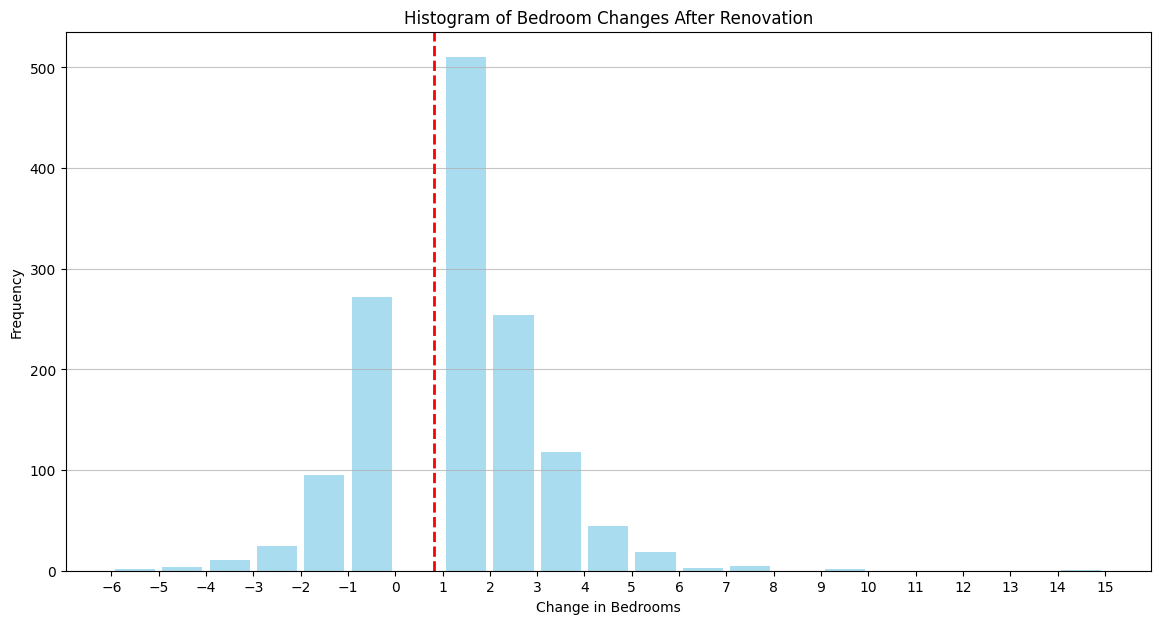

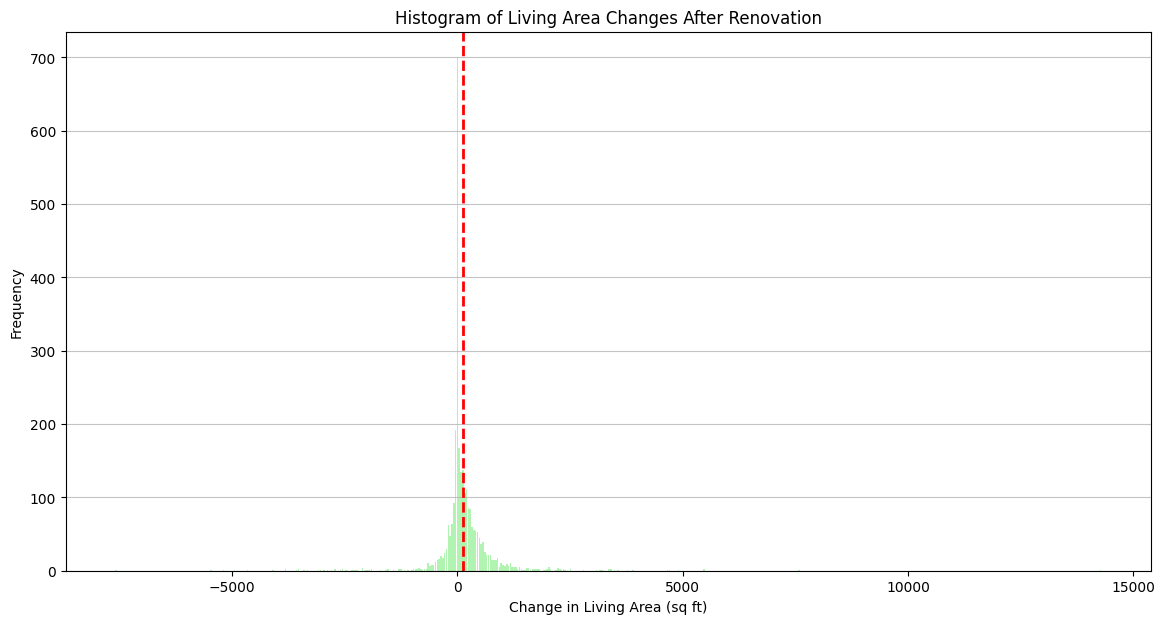

In [26]:
import matplotlib.pyplot as plt

# Filter to exclude no change for a clearer histogram
bedrooms_diff = after_renovation_data[after_renovation_data['bedrooms_diff'] != 0]['bedrooms_diff']
living_area_diff = after_renovation_data[after_renovation_data['living_area_diff'] != 0]['living_area_diff']

# This creates a list of bin edges from the min to max, with each edge separated by 1
bin_edges = range(int(min(bedrooms_diff)), int(max(bedrooms_diff)) + 2)

# Histogram for bedroom differences
plt.figure(figsize=(14, 7))
plt.hist(bedrooms_diff, bins=bin_edges, color='skyblue', alpha=0.7, rwidth=0.85)
plt.title('Histogram of Bedroom Changes After Renovation')
plt.xlabel('Change in Bedrooms')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.axvline(bedrooms_diff.mean(), color='red', linestyle='dashed', linewidth=2)  # Mean line
# This sets the x-axis ticks to every integer within the range of your data
plt.xticks(bin_edges)
plt.show()

# Histogram for living area differences
plt.figure(figsize=(14, 7))
plt.hist(living_area_diff, bins='auto', color='lightgreen', alpha=0.7, rwidth=0.85)
plt.title('Histogram of Living Area Changes After Renovation')
plt.xlabel('Change in Living Area (sq ft)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.axvline(living_area_diff.mean(), color='red', linestyle='dashed', linewidth=2)  # Mean line
plt.show()

The histograms show the distribution of changes in bedrooms and living area after renovation. It looks like the histogram for living area changes has a few extreme values that make the rest of the data hard to read because the bins are too wide to meaningfully represent most of the data. These extreme values, also known as outliers, are causing the scale of the x-axis to be very wide, which compresses the majority of the data into a small number of bins.

For the living area histogram, you might want to consider excluding extreme values that are not representative of the general trends. This can be done by calculating a reasonable range based on the interquartile range (IQR), for example:

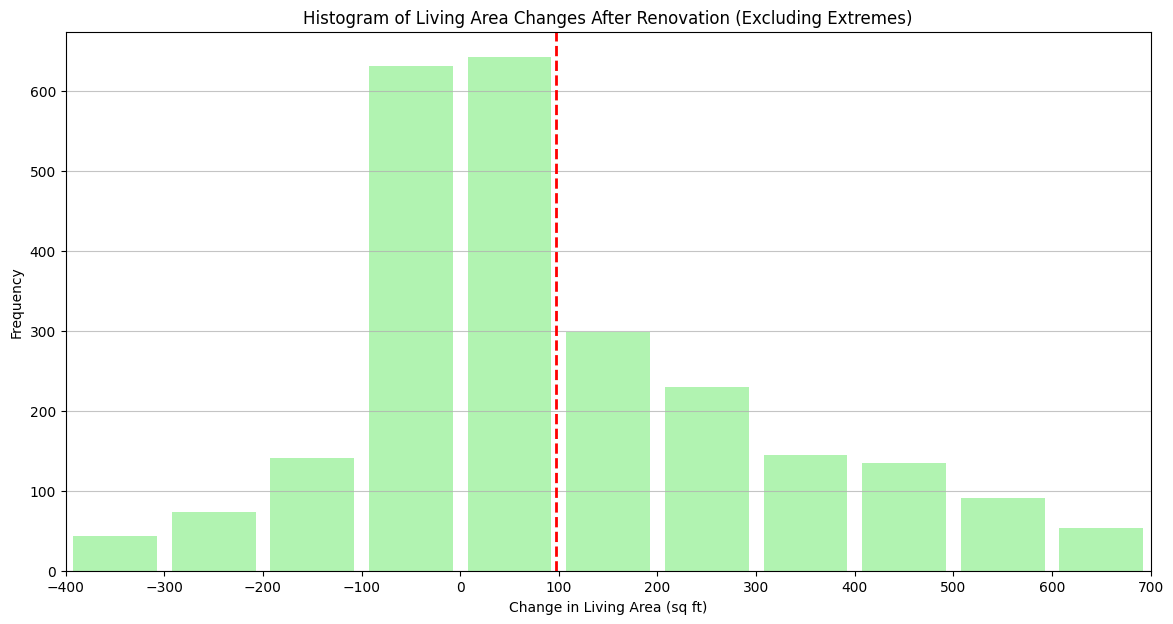

In [27]:
# Calculate the IQR for living area differences
Q1 = living_area_diff.quantile(0.25)
Q3 = living_area_diff.quantile(0.75)
IQR = Q3 - Q1

# Define reasonable lower and upper bounds for the data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the living area differences to exclude outliers
filtered_living_area_diff = living_area_diff[(living_area_diff > lower_bound) & (living_area_diff < upper_bound)]

# # Histogram for filtered living area differences
# plt.figure(figsize=(14, 7))
# plt.hist(filtered_living_area_diff, bins='auto', color='lightgreen', alpha=0.7, rwidth=0.85)
# plt.title('Histogram of Living Area Changes After Renovation (Excluding Extremes)')
# plt.xlabel('Change in Living Area (sq ft)')
# plt.ylabel('Frequency')
# plt.grid(axis='y', alpha=0.75)
# plt.axvline(filtered_living_area_diff.mean(), color='red', linestyle='dashed', linewidth=2)  # Mean line

# Calculate rounded bounds for better tick marks
rounded_lower_bound = int(round(lower_bound, -2))  # Round to nearest hundred
rounded_upper_bound = int(round(upper_bound, -2))  # Round to nearest hundred

# # Set x-axis ticks at intervals of 100 square feet
# plt.xticks(range(rounded_lower_bound, rounded_upper_bound + 100, 100))

# # Set the x-axis limits to focus on the range from the lower to upper bound
# plt.xlim(rounded_lower_bound, rounded_upper_bound)


# plt.show()

# Choose a bin width
bin_width = 100  # For example, every 100 square feet

# Generate bin edges from the lower to the upper bound, with the chosen bin width
bin_edges = list(range(rounded_lower_bound, rounded_upper_bound + bin_width, bin_width))

# Histogram for filtered living area differences
plt.figure(figsize=(14, 7))
plt.hist(filtered_living_area_diff, bins=bin_edges, color='lightgreen', alpha=0.7, rwidth=0.85)
plt.title('Histogram of Living Area Changes After Renovation (Excluding Extremes)')
plt.xlabel('Change in Living Area (sq ft)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.axvline(filtered_living_area_diff.mean(), color='red', linestyle='dashed', linewidth=2)

# Use the same bin edges for the ticks
plt.xticks(bin_edges)

# Set the x-axis limits to focus on the range from the lower to upper bound
plt.xlim(rounded_lower_bound, rounded_upper_bound)

plt.show()


